In [1]:
import numpy as np
import fluidfoam as ff
import matplotlib.pyplot as plt
from scipy import interpolate
import joblib

## MHD方程，待补充
$$\nabla \cdot u$$
$$u\frac{d\phi}{dx}=\alpha\frac{d^2\phi}{dx^2}$$

In [2]:
rootPath = '/home/whw/OpenFOAM/whw-v2412/run/coupledCases/'

Gr_all = [1e4, 2e4, 3e4, 4e4]
Ha_all = [1e2, 2e2, 3e2, 4e2, 5e2]

Gr_all_str = [f"{x:.0e}".replace("+0", "").replace("+", "") for x in Gr_all]
Ha_all_str = [f"{x:.0e}".replace("+0", "").replace("+", "") for x in Ha_all]

In [3]:
test_path = rootPath + 'Gr3e4,Ha3e2'
mesh = ff.readof.readmesh(test_path)

Reading file /home/whw/OpenFOAM/whw-v2412/run/coupledCases/Gr3e4,Ha3e2/constant/polyMesh/owner
Reading file /home/whw/OpenFOAM/whw-v2412/run/coupledCases/Gr3e4,Ha3e2/constant/polyMesh/faces
Reading file /home/whw/OpenFOAM/whw-v2412/run/coupledCases/Gr3e4,Ha3e2/constant/polyMesh/points
Reading file /home/whw/OpenFOAM/whw-v2412/run/coupledCases/Gr3e4,Ha3e2/constant/polyMesh/neighbour


In [4]:
U = ff.readof.readfield(test_path,'1000','U')
T = ff.readof.readfield(test_path, '1000', 'T')

Reading file /home/whw/OpenFOAM/whw-v2412/run/coupledCases/Gr3e4,Ha3e2/1000/U
Reading file /home/whw/OpenFOAM/whw-v2412/run/coupledCases/Gr3e4,Ha3e2/1000/T


In [ ]:
(T.mean()-723.15)*1e3

In [5]:
# 你的三维坐标和对应的值
x = mesh[0]
y = mesh[1]
z = mesh[2]
values = U[2]

# 将 x, y, z 合并为一个 (n, 3) 的数组，表示每个点的三维坐标
points = np.vstack((x, y, z)).T

# 创建最近邻插值模型
interp_func = interpolate.NearestNDInterpolator(points, values)


In [6]:
# 现在可以通过插值模型对新点进行快速插值
x_inter = np.linspace(0, 0.04, 32)
y_inter = np.linspace(0, 0.04, 32)
z_inter = np.linspace(0, 0.3, 16)

# 创建 meshgrid
X, Y = np.meshgrid(x_inter, y_inter)

# 固定 z 值为 0.15
Z = np.full_like(X, 0.15)

# 将网格转换为 (16*16*16, 3) 的数组，每一行是一个点的坐标
points_inter = np.vstack((X.ravel(), Y.ravel(), Z.ravel())).T


# 使用模型进行插值
interpolated_values = interp_func(points_inter)

(0.0, 0.04, 0.0, 0.04)

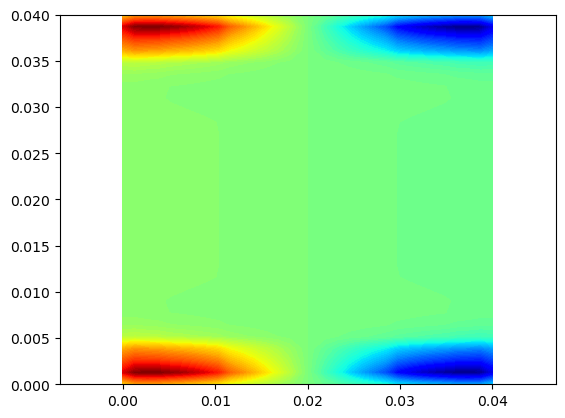

In [7]:
plt.contourf(X,Y , interpolated_values.reshape(X.shape), levels=100, cmap='jet')
plt.axis('equal')

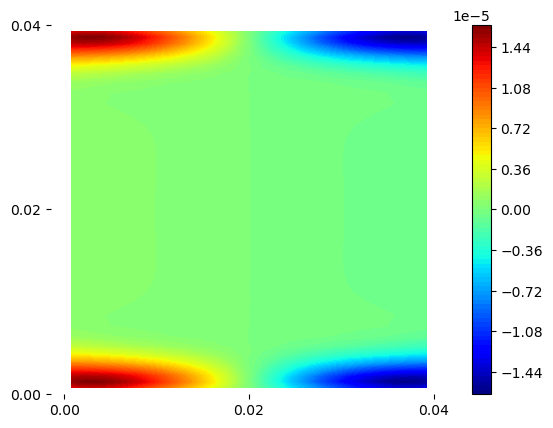

In [10]:
arr = mesh[2]
target_value = 1.49479390e-01
indices = np.where(arr == target_value)[0]
c = plt.tricontourf(mesh[0][indices], mesh[1][indices], U[2][indices], levels=100, cmap='jet')
plt.axis('equal')
plt.colorbar(c)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([0, 0.02, 0.04])
ax.set_yticks([0, 0.02, 0.04])
plt.savefig('result/Gr3e3,Ha3e2_CFD.png')